# Trending Topics of Pratham Education Foundation on Google News

Problem Statement:
Find relevant data sources (for example, publicly available news or online social media) and identify trending topics of Pratham.

Expected Result:
Please submit your notebook containing code and explanations justifying your approach, thought process, ideas, and rationale of your solution.

Approach:
1. The first step towards solving the problem was to collect data. Scraping data from social media would have taken time since most of them require an API key which has an approval process. 
2. So in order to identify trending topics I choose google news as my data source.
3. Now came the data extraction part. We needed to scrape search results for pratham education foundation in google news. I came across the newapi website which provides api keys for different websites to scrape data
https://newsapi.org/
4. Then I came accross python library called GoogleNews which was easy to use and was giving the results which i was looking for https://pypi.org/project/GoogleNews/
5. I also explored a library called pytrends which gives trending topics results https://pypi.org/project/pytrends/
6. After doing all the research i used the google news library to extract search results for pratham education foundation. The results came in the form of list which contained information such as title of the news, description of the news date of the news article,link of the article and the website of the article.
7. In the next steps are seperated out the title data from the results and put it in a data frame for analysis. I also seperated out the site information and the description data and put it into seperate dataframes
8. I then created a function to extract all the string values from the title data, did a bit of data preprocessing by converting all the news data into lowercase and removing whitespaces from the left and right. Using the stop_words library i got the list of stop words. Created a function to remove the stop words from our corpus. Got the frequency distribution of the words in our corpus.
9. Since we want the trending topics for our keyword search, the best way to visulaize that would be a word cloud wherein just by looking at it we would be able to know what is trending. 
10. I created a function to create a wordcloud using the wordcloud library 
11. Then i added a source column to the main data frame which contained the websites from which the article came from.
12. A good analysis for the search keyword would be to find out which media houses are covering the topic of education and the initiatives of pratham education foundation.
13. So in order to do the above analysis , i got the counts of articles by media houses.
14. The description corpus was a bit different, so the same steps as the title corpus was followed and a word cloud was plotted.
15. Libraries used were pandas,nltk,stop_words,wordcloud





In [102]:
#Importing the neccessary Libraries
import pandas as pd
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import stop_words
import matplotlib.pyplot as plt

In [103]:
#Importing the google news library and initializing it 
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [104]:
#Choosing the langauge , period for which the news needs to be extrated, encoding and the search keyword  
googlenews = GoogleNews(lang='en')
googlenews = GoogleNews(period='15d')
googlenews = GoogleNews(encode='utf-8')
googlenews.get_news('pratham education foundation')

In [105]:
#Viewing the results 
googlenews.results()

[{'title': 'Haryana govt join hands with Pratham Education Foundation for starting play schools in villages',
  'desc': 'Chandigarh (Haryana) [India], October 10 (ANI): Haryana Women and Child Development Department and Elementary Education Department on Friday entered ...',
  'date': '10 Oct',
  'datetime': datetime.datetime(2020, 10, 10, 7, 0),
  'link': 'news.google.com/./articles/CBMilQFodHRwOi8vd3d3LmJ1c2luZXNzd29ybGQuaW4vYXJ0aWNsZS9IYXJ5YW5hLWdvdnQtam9pbi1oYW5kcy13aXRoLVByYXRoYW0tRWR1Y2F0aW9uLUZvdW5kYXRpb24tZm9yLXN0YXJ0aW5nLXBsYXktc2Nob29scy1pbi12aWxsYWdlcy8xMC0xMC0yMDIwLTMyOTkyNtIBAA?hl=en-IN&gl=IN&ceid=IN%3Aen',
  'img': 'https://lh4.googleusercontent.com/proxy/NCNYxSvuAnGBoL-LeMbng5DkhYiLhGpugp7a29qvCkBgICr47z51bEWRfMj5s4KzYBS3yb-C9dhtjssNO-23k3nzK9IxWvstbA3M7sAhQfL9EWgv9ZT1OojtZY55oXI=-p-h100-w100',
  'media': None,
  'site': 'BW Businessworld'},
 {'title': 'Amazon India Launches Delivering Smiles Program to Support the Education of Students From Marginalized Communities',
  

In [106]:
#Result is in the form of a list
type(googlenews.results())

list

In [107]:
#92 Results from page1 of the keyword search 
len(googlenews.results())

92

In [108]:
#Extracting the website source information and appending it to a list
l=[]
for i in range(len(googlenews.results())):
    l.append(googlenews.results()[i]['site'])

In [109]:
#Extracting the news description information and appending it to a list
desc=[]
for i in range(len(googlenews.results())):
    desc.append(googlenews.results()[i]['desc'])

In [110]:
#Converting the description information into a DataFrame
description=pd.DataFrame(desc)

In [111]:
description.head()

,0
0,"Chandigarh (Haryana) [India], October 10 (ANI)..."
1,(Eds: Disclaimer: The following press release ...
2,"In the week of the survey in September, about ..."
3,Education News: GUWAHATI: Even as schools will...
4,As per the Annual Status of Education Report (...


In [112]:
#Converting the source information into a DataFrame
source=pd.DataFrame(l)

In [113]:
source.head()

,0
0,BW Businessworld
1,Outlook India
2,The Hindu
3,Times of India
4,thenortheasttoday.com


In [114]:
#Renaming the Column of the source data frame
source=source.rename(columns={0: "source"})

In [115]:
#Getting the results as text
googlenews.get_texts()

['Haryana govt join hands with Pratham Education Foundation for starting play schools in villages',
 'Amazon India Launches Delivering Smiles Program to Support the Education of Students From Marginalized Communities',
 'Nearly 20% of rural school children had no textbooks due to COVID-19 impact, finds ASER survey',
 '‘Only 52% of Assam govt school students have access to smartphones’',
 'The challenges with mobile learning in North-East India',
 "How Reservation In Private Schools Isn't Working For Poor Children",
 'HT City Spotlight: E-Learning - A substitute for classroom teaching',
 'This NGO is ensuring students in Lucknow govt schools learn banking as a life skill',
 '5% students attend live online classes: Report',
 "'Missed Call Do, Kahaani Suno': Bengaluru publishing house",
 'New research reveals best investments to tackle learning crisis in vulnerable countries',
 'Missed Call Do, Kahaani Suno',
 'Maids receive lessons in best Covid practices',
 'Proficiency in first languag

In [116]:

df=googlenews.get_texts()

In [117]:
#Converting the reults into a data frame
text=pd.DataFrame(df)

In [118]:
text.shape

(92, 1)

In [119]:
#Renaming column
text=text.rename(columns={0: "News"})

In [120]:
text.columns

Index(['News'], dtype='object')

In [121]:
text.head(20)

,News
0,Haryana govt join hands with Pratham Education...
1,Amazon India Launches Delivering Smiles Progra...
2,Nearly 20% of rural school children had no tex...
3,‘Only 52% of Assam govt school students have a...
4,The challenges with mobile learning in North-E...
5,How Reservation In Private Schools Isn't Worki...
6,HT City Spotlight: E-Learning - A substitute f...
7,This NGO is ensuring students in Lucknow govt ...
8,5% students attend live online classes: Report
9,"'Missed Call Do, Kahaani Suno': Bengaluru publ..."


In [122]:
#nltk.download('punkt')

In [123]:
#function to extract all strings from the data frame
def get_str_list(ser):
    str_all = ' '.join(list(ser))
    
    return str_all

In [124]:
type(str_all)

str

In [125]:
#Funtion to remove stop words
def remove_stop_words(words,st):
    new_list = []
    st = set(st)
    for i in words:
        if(i not in st):
            new_list.append(i)
            
    return new_list

In [126]:
#getting the stop words in a list
st = stop_words.get_stop_words("en")

In [127]:
st

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [128]:
type(st)

list

In [129]:
## converting everything to lower case , striping white spaces, 
#calling the get_str_list function, tokenizing and getting the frequency distribution of the words 
text["News"] = text["News"].str.lower()
text["News"] = text["News"].str.lstrip().str.rstrip()
str_all = get_str_list(text["News"].str.lower())

words = nltk.tokenize.word_tokenize(str_all)
fdist = FreqDist(words)

In [130]:
#Removing stop words from the corpus and putting it in a list
list_all1 = remove_stop_words(words,st)

In [131]:
#Getting the list of most common words
fdist.most_common()

[('in', 35),
 ('education', 27),
 (':', 25),
 ('for', 24),
 ('the', 23),
 (',', 22),
 ('to', 21),
 ('of', 19),
 ('schools', 16),
 ('india', 16),
 ('pratham', 15),
 ('a', 12),
 ('children', 11),
 ('learning', 11),
 ('how', 11),
 ('’', 10),
 ('with', 8),
 ('students', 8),
 ('%', 8),
 ('covid-19', 8),
 ('lockdown', 8),
 ('school', 7),
 ('is', 7),
 ('as', 7),
 ('can', 7),
 ('online', 6),
 ('indian', 6),
 ('during', 6),
 ('s', 6),
 ('and', 6),
 ('foundation', 5),
 ('ngo', 5),
 ('new', 5),
 ('we', 5),
 ("'s", 5),
 ('digital', 5),
 ('govt', 4),
 ('aser', 4),
 ('survey', 4),
 ('this', 4),
 ("'", 4),
 ('up', 4),
 ('pandemic', 4),
 ('kids', 4),
 ('just', 4),
 ('on', 4),
 ('study', 4),
 ('are', 4),
 ('|', 4),
 ('more', 4),
 ('coronavirus', 4),
 ('out', 4),
 ('2020', 4),
 ('from', 3),
 ('have', 3),
 ('poor', 3),
 ('e-learning', 3),
 ('teaching', 3),
 ('learn', 3),
 ('5', 3),
 ('classes', 3),
 ('report', 3),
 ('do', 3),
 ('among', 3),
 ('an', 3),
 ('annual', 3),
 ('status', 3),
 ('has', 3),
 ('that

In [132]:
#Function to generate word cloud of most common  words
def generate_wordcloud(text): 
    wordcloud = WordCloud(
            background_color ='black',relative_scaling = 1,
                          collocations = False,
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    return wordcloud

In [133]:
str_all_rejoin = ' '.join(list_all1)

In [134]:
str_all_rejoin[0:42]

'haryana govt join hands pratham education '

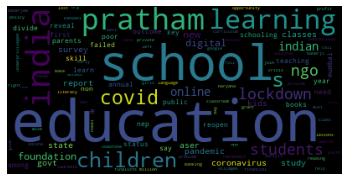

In [135]:
#Generating the word cloud
wc = generate_wordcloud(str_all_rejoin)

In [136]:
wc.words_

{'education': 1.0,
 'school': 0.8518518518518519,
 'india': 0.5925925925925926,
 'pratham': 0.5555555555555556,
 'learning': 0.5185185185185185,
 'children': 0.4074074074074074,
 's': 0.4074074074074074,
 'covid': 0.37037037037037035,
 'students': 0.2962962962962963,
 'ngo': 0.2962962962962963,
 'lockdown': 0.2962962962962963,
 'online': 0.2222222222222222,
 'indian': 0.2222222222222222,
 'foundation': 0.18518518518518517,
 'new': 0.18518518518518517,
 'digital': 0.18518518518518517,
 'govt': 0.14814814814814814,
 'aser': 0.14814814814814814,
 'survey': 0.14814814814814814,
 'e': 0.14814814814814814,
 'classes': 0.14814814814814814,
 'report': 0.14814814814814814,
 'pandemic': 0.14814814814814814,
 'kids': 0.14814814814814814,
 'study': 0.14814814814814814,
 'coronavirus': 0.14814814814814814,
 'state': 0.14814814814814814,
 'poor': 0.1111111111111111,
 'teaching': 0.1111111111111111,
 'learn': 0.1111111111111111,
 'skill': 0.1111111111111111,
 'first': 0.1111111111111111,
 'among': 0.

In [137]:
news_source=text.copy()

In [138]:
#Adding the source column to the text dataframe
news_source['source']=source

In [139]:
news_source.head()

,News,source
0,haryana govt join hands with pratham education...,BW Businessworld
1,amazon india launches delivering smiles progra...,Outlook India
2,nearly 20% of rural school children had no tex...,The Hindu
3,‘only 52% of assam govt school students have a...,Times of India
4,the challenges with mobile learning in north-e...,thenortheasttoday.com


In [140]:
#Value counts of sources which gives the newspaper wise coverage of the search keyword
news_source.source.value_counts()

Times of India             6
The Hindu                  6
IndiaSpend                 4
Hindustan Times            4
Business Standard          3
The Indian Express         3
Scroll.in                  3
EdexLive                   3
India Education Diary      2
The Sunday Guardian        2
Times Now                  2
Outlook India              2
The New Indian Express     2
thenortheasttoday.com      1
Forbes India               1
The Times of India Blog    1
Qrius                      1
Aljazeera.com              1
Mumbai Mirror              1
Newslaundry                1
ThePrint                   1
The Financial Express      1
BBC News                   1
Foreign Policy             1
Citizen Matters            1
Youth Ki Awaaz             1
GOV.UK                     1
BW Businessworld           1
Big Think                  1
HuffPost India             1
The Shillong Times         1
Deccan Herald              1
Elets                      1
Barak Bulletin             1
styledemocracy

In [141]:
news_source.to_csv('final.csv')

In [142]:
description=description.rename(columns={0: "Description"})

In [143]:
description.columns

Index(['Description'], dtype='object')

In [144]:
## converting everything to lower case , striping white spaces, 
#calling the get_str_list function, tokenizing and getting the frequency distribution of the words 
description["Description"] = description["Description"].str.lower()
description["Description"] = description["Description"].str.lstrip().str.rstrip()
str_all = get_str_list(description["Description"].str.lower())

words = nltk.tokenize.word_tokenize(str_all)
fdist = FreqDist(words)

In [145]:
fdist.most_common()

[('the', 124),
 (',', 88),
 ('of', 84),
 ('to', 75),
 ('in', 66),
 ('.', 58),
 ('...', 57),
 ('and', 42),
 ('a', 38),
 ('education', 32),
 ('with', 32),
 ('schools', 24),
 (':', 21),
 ('for', 21),
 ('children', 21),
 ('learning', 21),
 ('is', 20),
 ('has', 19),
 ('on', 18),
 ("'s", 16),
 ('students', 14),
 ('that', 14),
 ('india', 13),
 ('government', 13),
 ('this', 13),
 ('pratham', 13),
 ('%', 12),
 ('by', 12),
 ('at', 11),
 ('school', 11),
 ('are', 11),
 ('(', 10),
 (')', 10),
 ('as', 10),
 ('covid-19', 10),
 ('more', 10),
 ('pandemic', 9),
 ('not', 9),
 ('an', 8),
 ('will', 8),
 ('new', 8),
 ('read', 8),
 ('how', 8),
 ('it', 8),
 ('lockdown', 8),
 ('all', 7),
 ('foundation', 7),
 ('–', 7),
 ('among', 7),
 ('its', 7),
 ('years', 7),
 ('rural', 6),
 ('from', 6),
 ('report', 6),
 ('2020', 6),
 ('than', 6),
 ('one', 5),
 ('across', 5),
 ('only', 5),
 ('studying', 5),
 ('parents', 5),
 ('which', 5),
 ('policy', 5),
 ('have', 5),
 ('mumbai', 5),
 ('can', 5),
 ('according', 5),
 ('out', 5

In [146]:
list_all2 = remove_stop_words(words,st)

In [147]:
str_all_rejoin_1 = ' '.join(list_all2)

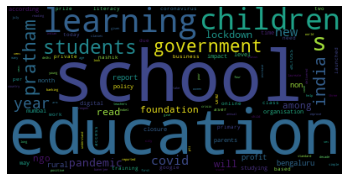

In [148]:
wc1 = generate_wordcloud(str_all_rejoin_1)

# References
https://pypi.org/project/pytrends/

https://pypi.org/project/GoogleNews/
